# Applied

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly,
                         sklearn_sm)

import statsmodels.api as sm

from sklearn.model_selection import (train_test_split,
                                     cross_validate,
                                     KFold,
                                     ShuffleSplit)
from functools import partial
from sklearn.base import clone

## 5.

In [2]:
Default = load_data('Default')
Default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


### (a)

In [3]:
design = MS(['balance', 'income'])
X = design.fit_transform(Default)
y = Default['default'] == 'Yes'

logit = sm.GLM(y, X, family=sm.families.Binomial())
results = logit.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-11.540500,0.435000,-26.544,0.0
balance,0.005600,0.000000,24.835,0.0
income,0.000021,0.000005,4.174,0.0


### (b)

In [4]:
Default_train, Default_test, y_train, y_test = train_test_split(Default, 
                                               y,
                                               test_size=0.5,
                                               random_state=0)
Default_train.shape, y_train.shape

((5000, 4), (5000,))

In [5]:
X_train = design.transform(Default_train)
X_test = design.transform(Default_test)
# fitting on training set
logistic = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results_logistic = logistic.fit()

# predict on validation set
pred = np.where(results_logistic.predict(X_test) > 0.5, True, False)
# validation set error
np.mean(pred != y_test)

0.029

### (c)

In [6]:
Default_train, Default_test, y_train, y_test = train_test_split(Default, 
                                               y,
                                               test_size=0.5,
                                               random_state=1)
Default_train.shape, y_train.shape

((5000, 4), (5000,))

In [7]:
X_train = design.transform(Default_train)
X_test = design.transform(Default_test)
# fitting on training set
logistic = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results_logistic = logistic.fit()

# predict on validation set
pred = np.where(results_logistic.predict(X_test) > 0.5, True, False)
# validation set error
np.mean(pred != y_test)

0.025

In [8]:
Default_train, Default_test, y_train, y_test = train_test_split(Default, 
                                               y,
                                               test_size=0.5,
                                               random_state=2)
Default_train.shape, y_train.shape

((5000, 4), (5000,))

In [9]:
X_train = design.transform(Default_train)
X_test = design.transform(Default_test)
# fitting on training set
logistic = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results_logistic = logistic.fit()

# predict on validation set
pred = np.where(results_logistic.predict(X_test) > 0.5, True, False)
# validation set error
np.mean(pred != y_test)

0.0248

In [10]:
Default_train, Default_test, y_train, y_test = train_test_split(Default, 
                                               y,
                                               test_size=0.5,
                                               random_state=10)
Default_train.shape, y_train.shape

((5000, 4), (5000,))

In [11]:
X_train = design.transform(Default_train)
X_test = design.transform(Default_test)
# fitting on training set
logistic = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results_logistic = logistic.fit()

# predict on validation set
pred = np.where(results_logistic.predict(X_test) > 0.5, True, False)
# validation set error
np.mean(pred != y_test)

0.0252

test error estimate is of high variance.  
Each time we split data set differently, the estimate changes substantially.

### (d)

In [12]:
Default_train, Default_test, y_train, y_test = train_test_split(Default, 
                                               y,
                                               test_size=0.5,
                                               random_state=0)
Default_train.shape, y_train.shape

((5000, 4), (5000,))

In [13]:
new_design = MS(['student', 'balance', 'income'])
X_train = new_design.fit_transform(Default_train)
X_test = new_design.transform(Default_test)
# fitting on training set
logistic = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results_logistic = logistic.fit()

# predict on validation set
pred = np.where(results_logistic.predict(X_test) > 0.5, True, False)
# validation set error
np.mean(pred != y_test)

0.0292

In [14]:
Default_train, Default_test, y_train, y_test = train_test_split(Default, 
                                               y,
                                               test_size=0.5,
                                               random_state=1)
Default_train.shape, y_train.shape

((5000, 4), (5000,))

In [15]:
new_design = MS(['student', 'balance', 'income'])
X_train = new_design.fit_transform(Default_train)
X_test = new_design.transform(Default_test)
# fitting on training set
logistic = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results_logistic = logistic.fit()

# predict on validation set
pred = np.where(results_logistic.predict(X_test) > 0.5, True, False)
# validation set error
np.mean(pred != y_test)

0.0262

It's hard to compare between two test error estimate because of variability, but when we compare two models using same random seed, the model including student as a predictor seems to have higher test error estimate.

## 6.

### (a)

In [16]:
X = design.transform(Default)
# fitting on training set
logit = sm.GLM(y, X, family=sm.families.Binomial())
results_logit = logit.fit()
summarize(results_logit)

,coef,std err,z,P>|z|
intercept,-11.540500,0.435000,-26.544,0.0
balance,0.005600,0.000000,24.835,0.0
income,0.000021,0.000005,4.174,0.0


Std for income is 0.000005 and for balance is zero.

In [17]:
results_logit.params['balance']

0.0056471029503164846

### (b)

In [18]:
def boot_fn(D, idx):
    # create bootstrap dataset
    D_ = D.iloc[idx]
    X_ = MS(['income', 'balance']).fit_transform(D_)
    y_ = D_['default'] == 'Yes'

    result_ = sm.GLM(y_, X_, family=sm.families.Binomial()).fit()
    # coefficients for income, balance
    return np.array([result_.params['income'], result_.params['balance']])

In [19]:
def boot_SE(D, boot_func, B=1000, seed=0):
    n = D.shape[0]

    # create bootstrap index
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    for _ in range(B):
        idx_ = rng.choice(n, size=n, replace=True)
        # get SE of params
        values_ = boot_func(D, idx_)
        first_ += values_**2
        second_ += values_

    return np.sqrt(first_/B - (second_/B)**2)

In [20]:
# income, balance
boot_SE(Default, boot_fn, B=1000, seed=0)

array([4.76719975e-06, 2.30435343e-04])

Std for income is 4.76e-06 and for balance is 0.0002304.

### (d)

Std for income obtained by bootstrap is substantially smaller than obtained by sm.GLM(). In contrast, std for balance obtained by bootstrap is substantially smaller than by sm.GLS().

## 7.

In [21]:
Weekly = load_data('Weekly')
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


### (a)

In [22]:
design = MS(['Lag1', 'Lag2']).fit(Weekly)
X = design.transform(Weekly)
y = Weekly.Direction == 'Up'

result1 = sm.GLM(y, X, family=sm.families.Binomial()).fit()
summarize(result1)

,coef,std err,z,P>|z|
intercept,0.2212,0.061,3.599,0.000
Lag1,-0.0387,0.026,-1.477,0.140
Lag2,0.0602,0.027,2.270,0.023


### (b)

In [23]:
X_new = X.iloc[1:]
y_new = y.iloc[1:]

result2 = sm.GLM(y_new, X_new, family=sm.families.Binomial()).fit()
summarize(result2)

,coef,std err,z,P>|z|
intercept,0.2232,0.061,3.630,0.000
Lag1,-0.0384,0.026,-1.466,0.143
Lag2,0.0608,0.027,2.291,0.022


### (c)

In [24]:
print('pred: {0}, label: {1}'.format((result2.predict(X.iloc[0]) > 0.5).iloc[0], y.iloc[0]))

pred: True, label: False


Incorrectly classified.

### (d)

In [25]:
n = Weekly.shape[0]
errors = np.empty(n)
for i in range(n):
    # drop ith row
    X_ = X.drop(i, axis=0)
    y_ = y.drop(i, axis=0)

    # fit remaining dataset
    result_ = sm.GLM(y_, X_, family=sm.families.Binomial()).fit()
    
    # indicate error
    errors[i] = (result_.predict(X.iloc[i]) > 0.5).iloc[0] != y.iloc[i]
errors

array([1., 1., 0., ..., 0., 0., 0.])

### (e)

In [26]:
np.mean(errors)

0.44995408631772266

Test error estimate is 0.44995.

## 8.

### (a)

In [27]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

n = 100, p = 2
$$
y = x - 2x^2 + N(0, 1)
$$

### (b)

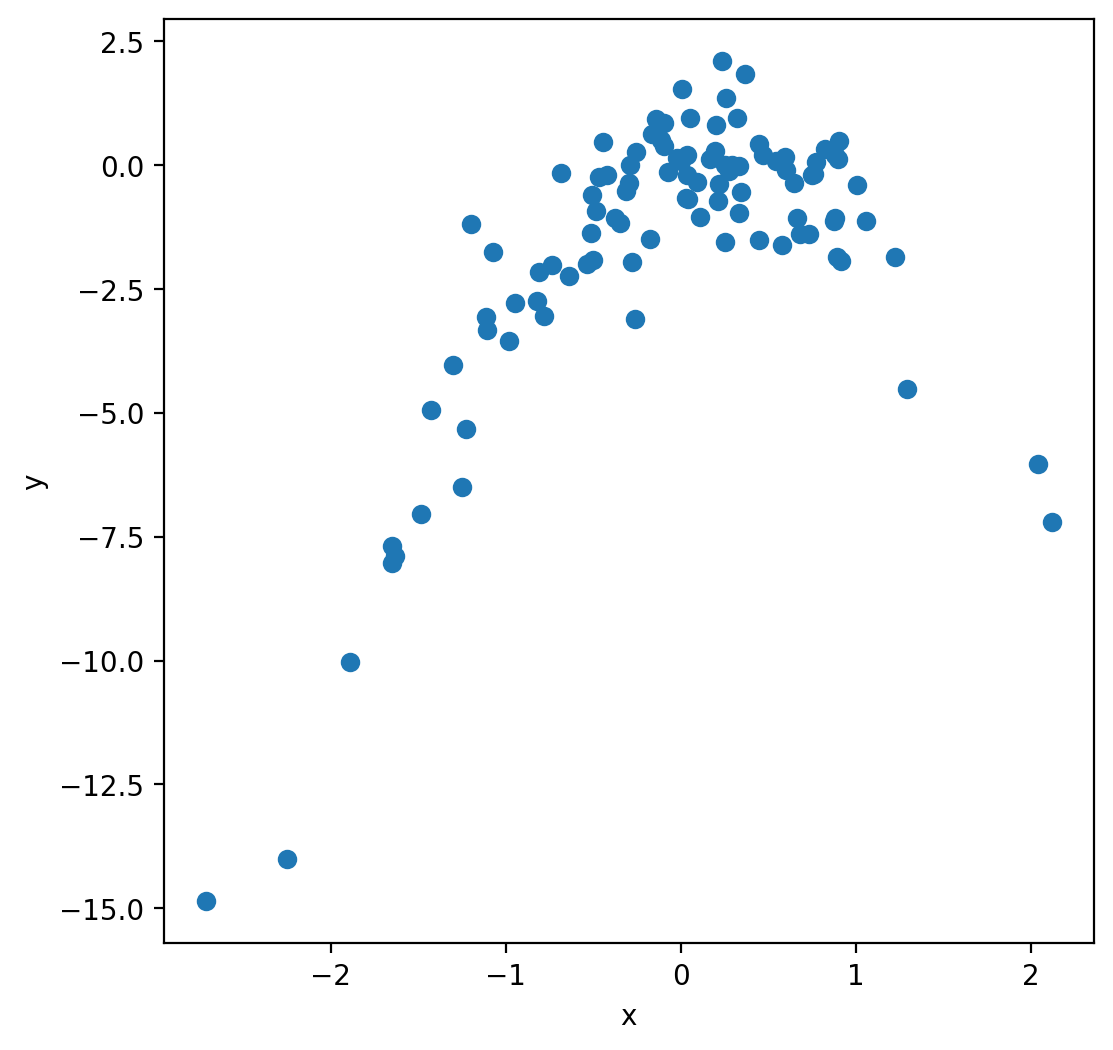

In [28]:
fig, ax = subplots(figsize=(6, 6))
ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y');

There is non-linear relationship between x and y.

### (c)

In [29]:
cv_error = np.empty(4)
n = y.shape[0]
M = sklearn_sm(sm.OLS)
for i, degree in enumerate(range(1, 5)):
    X = np.power.outer(x, np.arange(degree+1))
    M_CV = cross_validate(M,
                          X,
                          y,
                          cv=n)     ## LOOCV
    cv_error[i] = np.mean(M_CV['test_score'])
cv_error

array([6.63302984, 1.12293686, 1.30179655, 1.33239427])

### (d)

It doesn't change because there is no randomness in LOOCV process.

### (e)

model ii. (i.e. quadratic equation), which corresponds to the simulated equation form.

### (f)

In [30]:
p_values = []
for degree in range(1, 5):
    X = np.power.outer(x, np.arange(degree+1))
    result = sm.OLS(y, X).fit()

    p_values.append(result.pvalues.round(4))
p_values

[array([0., 0.]),
 array([0.5428, 0.    , 0.    ]),
 array([0.6345, 0.    , 0.    , 0.2872]),
 array([0.4596, 0.    , 0.    , 0.6425, 0.0231])]

P-values of the coefficients of the linear and quadratic term is very small, but the terms higher than cubic is not significant, which agrees with the conclusion drawn from cross-validation.

## 9.

In [31]:
Boston = load_data('Boston')
medv = Boston['medv']
medv.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

### (a)

In [32]:
mu = medv.mean()
mu

22.532806324110677

Sample mean (22.5328) is an unbiased estimate of the population mean.

### (b)

In [33]:
medv.std() / np.sqrt(len(medv))

0.40886114749753505

Standard error of the sample mean is $\frac{\sigma}{\sqrt{n}}$, which is 0.4089

### (c)

In [34]:
def boot_fn1(D, idx):
    D_ = D.iloc[idx]
    return np.mean(D_)

In [35]:
std = boot_SE(Boston['medv'], boot_fn1)
std

0.41253476750888246

Similar to the answer from (b).

### (d)

In [36]:
print('95% confidence interval of the mean of medv : [{0:.2f}, {1:.2f}]'.format(
    mu - 2*std,
    mu + 2*std
))

95% confidence interval of the mean of medv : [21.71, 23.36]


### (e)

In [37]:
medv.median()

21.2

### (f)

In [38]:
def boot_med(D, idx):
    D_ = D.iloc[idx]
    return np.median(D_, axis=0)

In [39]:
boot_SE(medv, boot_med)

0.36944622071302163

There is deviation of sample median from population median, by 0.3694 on average.

### (g)

In [40]:
np.percentile(medv, q=10)     # 10% percentile

12.75

### (f)

In [41]:
def boot_tenth(D, idx):
    D_ = D.iloc[idx]
    return np.percentile(D_, q=10, axis=0)

In [42]:
boot_SE(medv, boot_tenth)

0.5034541091295026

There is deviation of sample tenth percentile from population tenth percentile, by 0.5034 on average.